In [1]:
# !conda install -c anaconda tensorflow-gpu
# !conda install -c anaconda keras-gpu

In [2]:
# !wget https://s3.amazonaws.com/udacity-nd/training_data.zip

In [3]:
# !unzip training_data.zip

In [4]:
# !pip install keras_squeezenet


In [5]:
import keras 
keras.__version__

Using TensorFlow backend.


'2.1.2'

In [6]:

from keras import applications,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model 

from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import Dropout, Flatten, Dense

from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

from keras_squeezenet import SqueezeNet

In [7]:
import shutil,os
import pandas as pd
import yaml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
img_width, img_height = 224, 224
train_data_dir = "full-image/original-dataset/train"
validation_data_dir = "full-image/original-dataset/valid"
nb_train_samples = 40+255+223+43
nb_validation_samples = 48 
batch_size = 16
epochs = 100

In [9]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0.0,
width_shift_range = 0.0,
height_shift_range=0.0,
rotation_range=0)

In [10]:
valid_datagen = ImageDataGenerator(
rescale = 1./255,
fill_mode = "nearest",
zoom_range = 0.0,
width_shift_range = 0.0,
height_shift_range=0.0,
rotation_range=0)


In [11]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

print(train_generator.class_indices)

Found 541 images belonging to 4 classes.
{'Green': 0, 'Red': 1, 'Yellow': 2, 'noColor': 3}


In [12]:
classes = 4

model = SqueezeNet(include_top=False, pooling=None , input_shape=(224,224,3))
for layer in model.layers:
    layer.trainable = False

x = model.output
x = Dropout(0.5, name='drop9')(x)
x = Convolution2D(50, kernel_size=(3, 3), strides=(2,2), padding='valid', name='conv10')(x)
x = Activation('relu', name='relu_conv10')(x)

x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.6)(x)
x = Dense(512, activation="relu")(x)
x = Dense(classes, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = x)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.00003, momentum=0.9), metrics=["accuracy"])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
model_final.fit_generator(
train_generator,
steps_per_epoch =  75,
epochs = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
75/75 [==============================] - 15s 199ms/step - loss: 2.9702 - acc: 0.3657
Epoch 2/200
75/75 [==============================] - 14s 189ms/step - loss: 1.3982 - acc: 0.3910
Epoch 3/200
75/75 [==============================] - 15s 202ms/step - loss: 1.2580 - acc: 0.4120
Epoch 4/200
75/75 [==============================] - 14s 183ms/step - loss: 1.2414 - acc: 0.4228
Epoch 5/200
75/75 [==============================] - 14s 181ms/step - loss: 1.2122 - acc: 0.4214
Epoch 6/200
75/75 [==============================] - 15s 198ms/step - loss: 1.1798 - acc: 0.4274
Epoch 7/200
75/75 [==============================] - 14s 192ms/step - loss: 1.1612 - acc: 0.4540
Epoch 8/200
75/75 [==============================] - 15s 194ms/step - loss: 1.1578 - acc: 0.4484
Epoch 9/200
75/75 [==============================] - 14s 192ms/step - loss: 1.0837 - acc: 0.4930
Epoch 10/200
75/75 [==============================] - 14s 184ms/step - loss: 1.

75/75 [==============================] - 14s 187ms/step - loss: 0.4465 - acc: 0.7901
Epoch 82/200
75/75 [==============================] - 13s 179ms/step - loss: 0.4724 - acc: 0.7797
Epoch 83/200
75/75 [==============================] - 14s 187ms/step - loss: 0.4282 - acc: 0.7886
Epoch 84/200
75/75 [==============================] - 14s 183ms/step - loss: 0.4561 - acc: 0.7937
Epoch 85/200
75/75 [==============================] - 13s 179ms/step - loss: 0.4107 - acc: 0.8140
Epoch 86/200
75/75 [==============================] - 13s 178ms/step - loss: 0.4361 - acc: 0.7915
Epoch 87/200
75/75 [==============================] - 14s 186ms/step - loss: 0.4255 - acc: 0.8022
Epoch 88/200
75/75 [==============================] - 14s 186ms/step - loss: 0.4291 - acc: 0.8008
Epoch 89/200
75/75 [==============================] - 14s 181ms/step - loss: 0.4379 - acc: 0.8057
Epoch 90/200
75/75 [==============================] - 13s 178ms/step - loss: 0.4016 - acc: 0.8132
Epoch 91/200
75/75 [=============

75/75 [==============================] - 13s 179ms/step - loss: 0.2816 - acc: 0.8776
Epoch 165/200
75/75 [==============================] - 13s 175ms/step - loss: 0.2731 - acc: 0.8829
Epoch 166/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2744 - acc: 0.8832
Epoch 167/200
75/75 [==============================] - 14s 192ms/step - loss: 0.2865 - acc: 0.8772
Epoch 168/200
75/75 [==============================] - 14s 185ms/step - loss: 0.2501 - acc: 0.8896
Epoch 169/200
75/75 [==============================] - 14s 184ms/step - loss: 0.2504 - acc: 0.9006
Epoch 170/200
75/75 [==============================] - 13s 173ms/step - loss: 0.2551 - acc: 0.9086
Epoch 171/200
75/75 [==============================] - 15s 194ms/step - loss: 0.2511 - acc: 0.8984
Epoch 172/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2352 - acc: 0.9071
Epoch 173/200
75/75 [==============================] - 13s 175ms/step - loss: 0.2208 - acc: 0.9165
Epoch 174/200
75/75 [===

In [14]:
model_yaml = model_final.to_yaml()
with open("ros/src/tl_detector/light_classification/classifier_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [15]:
model_final.save('ros/src/tl_detector/light_classification/classifier_model_weights.h5')

In [16]:
!ls ros/src/tl_detector/light_classification

A.h5			       __init__.py	      test_image3.jpg
classifier_model-Copy1.yaml    __init__.pyc	      test_image3_original.jpg
classifier_model_weights_B.h5  test_image2.jpg	      test_image.jpg
classifier_model_weights.h5    test_image3_224.jpg    tl_classifier.py
classifier_model.yaml	       test_image3_d_255.jpg  tl_classifier.pyc


In [17]:
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 111, 111, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 111, 111, 64) 0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 55, 55, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [18]:
validation_generator = valid_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

images, labels = next(validation_generator)
print('Validation samples: {}'.format(len(labels)))

Found 34 images belonging to 4 classes.
Validation samples: 32


In [19]:
print(validation_generator.class_indices)

{'Green': 0, 'Red': 1, 'Yellow': 2, 'noColor': 3}


In [20]:
# Manual Inspection

In [21]:
!ls ros/src/tl_detector/light_classification

A.h5			       __init__.py	      test_image3.jpg
classifier_model-Copy1.yaml    __init__.pyc	      test_image3_original.jpg
classifier_model_weights_B.h5  test_image2.jpg	      test_image.jpg
classifier_model_weights.h5    test_image3_224.jpg    tl_classifier.py
classifier_model.yaml	       test_image3_d_255.jpg  tl_classifier.pyc


In [22]:
import cv2
import pdb

In [23]:
model_final.load_weights('ros/src/tl_detector/light_classification/classifier_model_weights.h5')

In [24]:
validation_generator = valid_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

images, labels = next(validation_generator)
print('Validation samples: {}'.format(len(labels)))

Found 34 images belonging to 4 classes.
Validation samples: 32


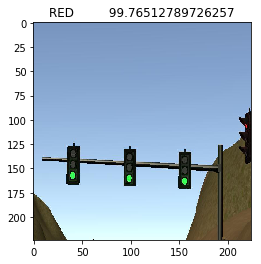

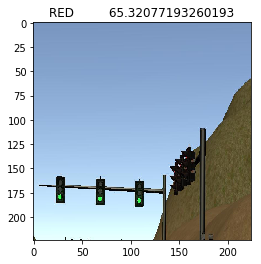

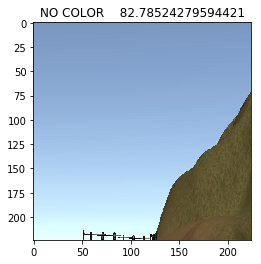

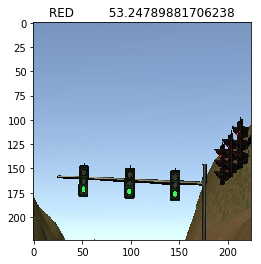

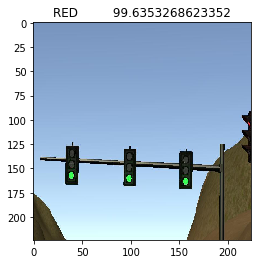

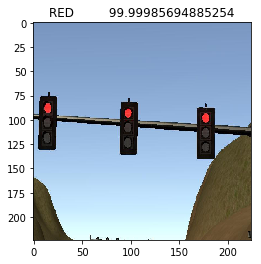

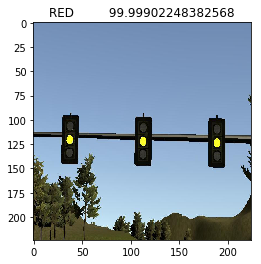

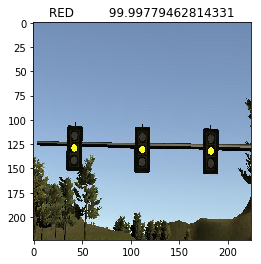

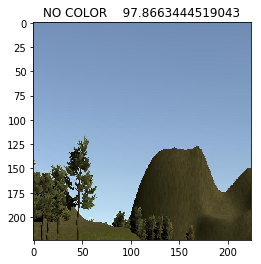

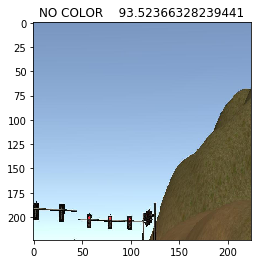

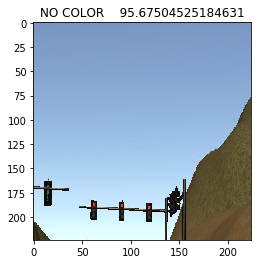

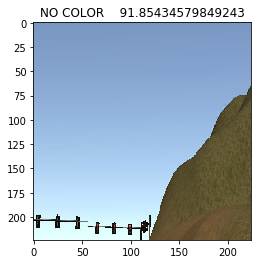

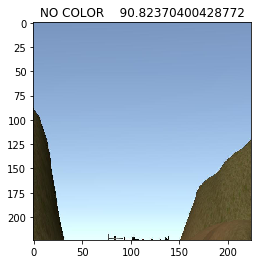

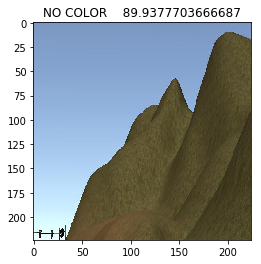

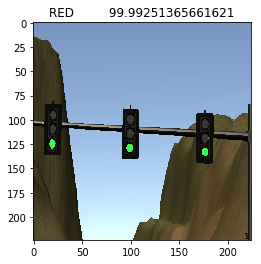

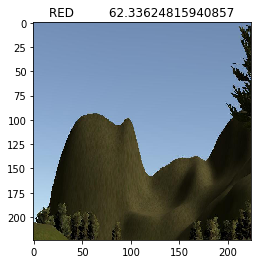

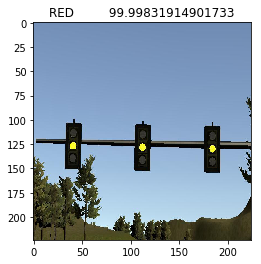

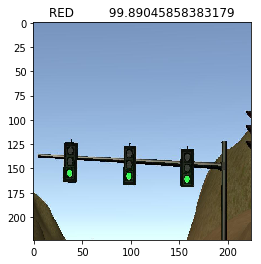

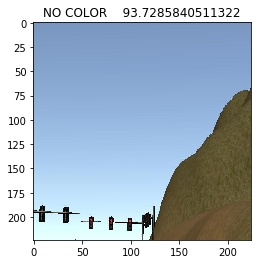

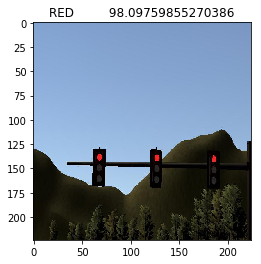

In [25]:
traffic_light_states = ['GREEN', 'RED', 'YELLOW', 'NO COLOR']

for i in range(len(images[:20])):
    
    img = images[i]
    
    plt.figure()
    
    prediction = model_final.predict(np.array([img]))[0]
    #print(prediction)
    prediction_label = traffic_light_states[prediction.argmax()]
    
    plt.title('{0:10}  {1}'.format(prediction_label, prediction.max()*100.0) )
    plt.imshow(img)

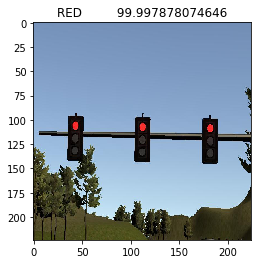

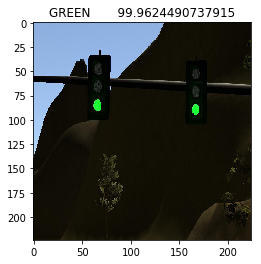

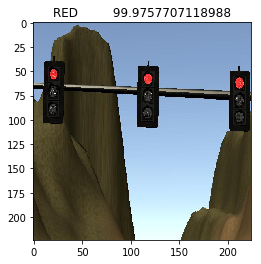

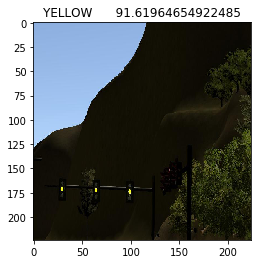

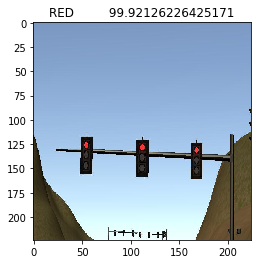

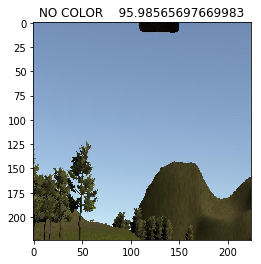

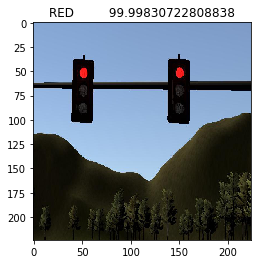

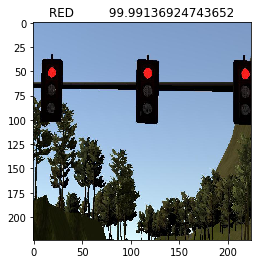

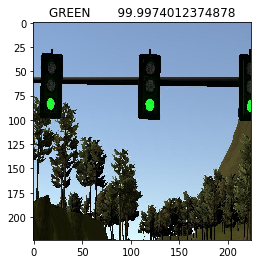

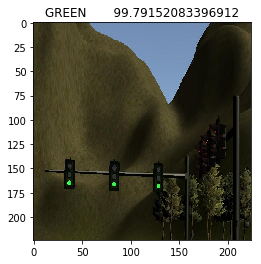

In [26]:
images, labels = next(train_generator)
for i in range(10):
    
    img = images[i]
    
    plt.figure()
    
    prediction = model_final.predict(np.array([img]))[0]
    #print(prediction)
    prediction_label = traffic_light_states[prediction.argmax()]
    
    plt.title('{0:10}  {1}'.format(prediction_label, prediction.max()*100.0) )
    plt.imshow(img)

In [27]:
np.set_printoptions(suppress=True)

In [28]:
!ls full-image/

 danielk-dataset       original-dataset		  Scratch
 just-traffic-lights  'original-dataset (copy)'   sim_training_data


(600, 800, 3)
RED
***********
1


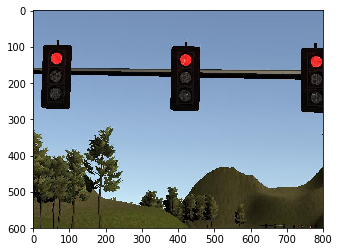

In [29]:
traffic_light_states = ['GREEN', 'RED', 'YELLOW', 'NO COLOR']

image=cv2.imread('ros/src/tl_detector/light_classification/test_image3_original.jpg')
# image=cv2.imread('full-image/original-dataset/train/Red/left0030.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.figure()
prediction = np.argmax(model_final.predict(cv2.resize(image, (224,224)).reshape(1,224,224,3))[0])
print(traffic_light_states[prediction])
print("***********")

print(np.array(prediction))
plt.imshow(RGB_img)
plt.show()


In [30]:
image.shape

(600, 800, 3)

In [31]:
# # Freeze the layers except the last 2 layers
# for layer in model_final.layers[:-2]:
#     layer.trainable = False

# # Check the trainable status of the individual layers    
# for layer in model_final.layers:
#     print(layer, layer.trainable)

In [32]:
# model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [33]:
# model_final.load_weights('ros/src/tl_detector/light_classification/classifier_model_weights.h5')

In [34]:
# model_final.fit_generator(
# validation_generator,
# steps_per_epoch =  75,
# epochs = 10)

In [35]:
# traffic_light_states = ['GREEN', 'RED', 'YELLOW', 'NO COLOR']

# image=cv2.imread('ros/src/tl_detector/light_classification/test_image3_original.jpg')
# RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# print(image.shape)
# plt.figure()
# print(model_final.predict(cv2.resize(image, (224,224)).reshape(1,224,224,3))[0].shape)
# prediction = np.argmax(model_final.predict(cv2.resize(image, (224,224)).reshape(1,224,224,3))[0])
# print(traffic_light_states[prediction])
# plt.imshow(RGB_img)
# plt.show()
# ## Green Showing Yellow

In [36]:
# model_final.save_weights('ros/src/tl_detector/light_classification/classifier_model_weights_B.h5')